<font color='blue'>Привет! Поздравляю с уже третьим выполненным проектом. Кажется, намерения у тебя серьезные. Меня зовут Алексей, я проверю твою работу и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда можно лучше)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Постарайся учесть все это в дальнейших проектах.  
Апдейт после проверки: очень хорошая работа, замечаний минимум.  
    Более подробно см. блок в конце.</font>

# Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федеральный оператор сотовой связи.   
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.   

### Описание тарифов   

### Тариф «Смарт»   
Ежемесячная плата: 550 рублей   
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика   
Стоимость услуг сверх тарифного пакета:   
минута разговора: 3 рубля   
сообщение: 3 рубля   
1 Гб интернет-трафика: 200 рублей   

### Тариф «Ультра»   
Ежемесячная плата: 1950 рублей   
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика   
Стоимость услуг сверх тарифного пакета:   
минута разговора: 1 рубль   
сообщение: 1 рубль   
1 Гб интернет-трафика: 150 рублей   

## План предварительного анализа тарифов компании "Мегалайн"      
   [1. Откроем файлы с данными и изучим общую информацию](#abcde)   
   
   
   [2. Подготовим данные:](#abcd)  
   
    - Приведем данные к нужным типам   
    - Найдем и исправим ошибки в данных   
    - Посчитаем для каждого пользователя:
        - количество сделанных звонков и израсходованных минут разговора по месяцам;   
        - количество отправленных сообщений по месяцам;   
        - объем израсходованного интернет-трафика по месяцам;   
        - помесячную выручку с каждого пользователя.      

   
   [3. Проанализируем данные:](#abc)
   
    - Опишем поведение клиентов оператора, исходя из выборки   
    - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?    
    - Посчитаем среднее количество, дисперсию и стандартное отклонение   
    - Построем гистограммы   
    - Опишем распределения   
   
  
  [4. Проверим гипотезы:](#ab)   
   
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;   
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;   
   
   
   [5. Сформулируем общий вывод](#a)   

<font color='green'>Молодец, что в начале работы коротко описываешь наши данные и обрисовываешь цели. Хороший план - уже пол дела.

### 1. Откроем файлы с данными и изучим общую информацию <a name="abcde"></a>


### Импорт библиотек

In [207]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st

### Откроем файлы

In [208]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Всего у нас 5 таблиц.   
**1.1 Изучим данные таблицы calls**

In [209]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Получим общую информацию о данных таблицы

In [210]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### Описание даных:   
   * id — уникальный номер звонка   
   * call_date — дата звонка   
   * duration — длительность звонка в минутах   
   * user_id — идентификатор пользователя, сделавшего звонок

In [211]:
calls['id'].describe()

count      202607
unique     202607
top       1115_75
freq            1
Name: id, dtype: object

В столбце id нет пропусков и повторяющихся значений, тип данных object соответствует требуемому

In [212]:
calls['call_date'].describe()

count         202607
unique           365
top       2018-12-31
freq            1435
Name: call_date, dtype: object

In [213]:
calls['call_date'].min()

'2018-01-01'

In [214]:
calls['call_date'].max()

'2018-12-31'

Столбец call_date не содержит пропусков. В столбце указано 365 дней звонков за 2018 год: с 01 января по 31 декабря. Тип данных object не соответствует требуемому datetime

In [215]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [216]:
len(calls.query('duration == 0')) 

39613

Столбец duration не содержит пропусков. Так как оператор связи при тарификации округляет минуты в большую сторону, тип данных float не соответствует требуемому. Столбец содержит 39613 нулевых значений длительности звонков 

In [217]:
len(calls['user_id'].value_counts())

492

In [218]:
calls['user_id'].isna().sum()

0

Столбец user_id не содержит пропуски, содержит информацию о 492 пользователях. Тип данных integer соответствует требуемому 

**1.2 Изучим данные таблицы internet**

In [219]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Получим общую информацию о данных таблицы

In [220]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


### Описание данных
Информация об интернет-сессиях:   
   * id — уникальный номер сессии   
   * mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)   
   * session_date — дата интернет-сессии   
   * user_id — идентификатор пользователя

В таблице присутствует ненужный столбец Unnamed: 0, дублирующий индексацию данных. От него надо избавиться.   
Все столбцы не содержат пропусков

<font color=blue>Метод read_csv() по умолчанию сам создает колонку с индексами. В данном случае, колонка с индексами у нас уже имеется, и мы можем сразу сделать её индексом датафрейма, указав index_col=0. Тогда ничего удалять не придется.

In [221]:
internet['id'].describe()

count      149396
unique     149396
top       1115_75
freq            1
Name: id, dtype: object

В столбце id нет пропусков и повторяющихся значений, тип данных object соответствует требуемому

In [222]:
len(internet.query('mb_used == 0'))

19598

Столбец mb_used не содержит пропусков. Так как оператор связи при тарификации округляет дробную часть использованных мегабайт в большую сторону, тип данных float не соответствует требуемому. Столбец содержит 19598 нулевых значений объема потраченного интернет-трафика

In [223]:
internet['session_date'].describe()

count         149396
unique           365
top       2018-12-31
freq            1057
Name: session_date, dtype: object

In [224]:
internet['session_date'].min()

'2018-01-01'

In [225]:
internet['session_date'].max()

'2018-12-31'

Столбец session_date не содержит пропусков. В столбце указано 365 дней интернет-сессий за 2018 год: с 01 января по 31 декабря. Тип данных object не соответствует требуемому datetime

In [226]:
len(internet['user_id'].value_counts())

497

Столбец user_id не содержит пропуски, содержит информацию о 497 пользователях. Тип данных integer соответствует требуемому

**1.3 Изучим данные таблицы messages**

In [227]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Получим общую информацию о данных таблицы

In [228]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Описание данных   
   * id — уникальный номер сообщения   
   * message_date — дата сообщения   
   * user_id — идентификатор пользователя, отправившего сообщение

In [229]:
messages['id'].describe()

count      123036
unique     123036
top       1368_71
freq            1
Name: id, dtype: object

В столбце id нет пропусков и повторяющихся значений, тип данных object соответствует требуемому

In [230]:
messages['message_date'].describe()

count         123036
unique           364
top       2018-12-31
freq             859
Name: message_date, dtype: object

In [231]:
messages['message_date'].min()

'2018-01-02'

In [232]:
messages['message_date'].max()

'2018-12-31'

Cтолбец message_date не содержит пропусков. В столбце указано 364 дня, когда были отправлены сообщения за 2018 год: с 02 января по 31 декабря. Тип данных object не соответствует требуемому datetime

In [233]:
len(messages['user_id'].value_counts())

426

Столбец user_id не содержит пропуски, содержит информацию о 426 пользователях. Тип данных integer соответствует требуемому

**1.4 Изучим данные таблицы tariffs**

In [234]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Получим общую информацию о данных таблицы

In [235]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Описание данных   
   * tariff_name — название тарифа   
   * rub_monthly_fee — ежемесячная абонентская плата в рублях   
   * minutes_included — количество минут разговора в месяц, включённых в абонентскую плату   
   * messages_included — количество сообщений в месяц, включённых в абонентскую плату   
   * mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)   
   * rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)   
   * rub_per_message — стоимость отправки сообщения сверх тарифного пакета   
   * rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Таблица содержит всего две записи - информацию о тарифе smart и о тарифе ultra.   
Все столбцы не имеют пропусков и дубликатов, тип данных соответствует требуемым

**1.5 Изучим данные последней таблицы users**

In [236]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Получим общую информацию о данных таблицы

In [237]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Описание данных   
   * user_id — уникальный идентификатор пользователя   
   * first_name — имя пользователя   
   * last_name — фамилия пользователя   
   * age — возраст пользователя (годы)   
   * reg_date — дата подключения тарифа (день, месяц, год)   
   * churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)   
   * city — город проживания пользователя   
   * tariff — название тарифного плана

In [238]:
len(users['user_id'].value_counts())

500

In [239]:
users['user_id'].max()

1499

Столбец user_id содержит 500 уникальных записей по одной на каждого уникального клиента: от 1000 до 1499. Тип данных integer соответствует требуемому

In [240]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Столбец age не содержит пропусков, тип данных integer соответствует требуемому

In [241]:
users['churn_date'].describe()

count             38
unique            33
top       2018-12-09
freq               2
Name: churn_date, dtype: object

Столбец churn_date содержит всего лишь 38 записей, остальные - пропуски. Тип данных object не соответствует требуемому datetime

In [242]:
users['city'].describe()

count        500
unique        76
top       Москва
freq          99
Name: city, dtype: object

Столбец city не содержит пропусков. Всего в нем 76 уникальных записей, то есть наименований разных городов. Тип данных object соответствует требуемому

In [243]:
users['first_name'].describe()

count       500
unique      246
top       Радим
freq          6
Name: first_name, dtype: object

Столбец first_name не содержит пропусков. Всего в нем 246 уникальных записей, то есть имен. Тип данных object соответствует требуемому

In [244]:
users['last_name'].describe()

count           500
unique          419
top       Андреенко
freq              5
Name: last_name, dtype: object

Столбец last_name не содержит пропусков. Всего в нем 419 уникальных записей, то есть фамилий. Тип данных object соответствует требуемому

In [245]:
users['reg_date'].describe()

count            500
unique           270
top       2018-05-28
freq               8
Name: reg_date, dtype: object

In [246]:
users['reg_date'].min()

'2018-01-01'

In [247]:
users['reg_date'].max()

'2018-12-31'

Столбец reg_date не содержит пропусков. Всего в нем 270 уникальных записей, с 01 января по 31 декабря 2018. Тип данных object не соответствует требуемому datetime

In [248]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Столбец tariff не содержит пропусков. Всего две уникальные записи - название тарифа smart или ultra. Тип данных object соответствует требуемому

### Вывод   

Всего для анализа у нас в наличии пять таблиц с данными. В четырех из них обнаружены следующие ошибки и несоответствия:   
1. Таблица calls:   
   * тип данных столбца call_date не соответствует типу datetime   
   * столбец duration содержит нулевые и дробные значения длительности звонков. Тип данных не соответствует требуемому integer      
2. Таблица internet:   
   * присутствует ненужный столбец Unnamed: 0, дублирующий индексацию данных   
   * столбец mb_used содержит нулевые и дробные значения объема потраченного интернет-трафика. Тип данных не соответствует требуемому integer         
   * тип данных столбца session_date не соответствует требуемому datetime     
3. Таблица messages:   
   * тип данных столбца message_date не соответствует требуемому datetime   
4. Таблица users:   
   * cтолбец churn_date содержит всего лишь 38 записей, остальные - пропуски. Тип данных не соответствует требуемому datetime   
   * тип данных столбца reg_date не соответствует требуемому datetime

<font color='green'>Данные загружены и подорбно изучены. Используются верные методы для получения общей информации о таблице. Найдены имеющиеся проблемы.

### 2. Подготовим данные к анализу<a name="abcd"></a>

Приведем данные столбцов с датами к нужному типу datetime

In [249]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [250]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [251]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [252]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [253]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Исправим оставшиеся ошибки в данных

In [254]:
users['churn_date'].describe()

count                      38
unique                     33
top       2018-10-03 00:00:00
freq                        2
first     2018-08-17 00:00:00
last      2018-12-30 00:00:00
Name: churn_date, dtype: object

Столбец churn_date содержит 92.4% пропусков. Пропуски означают, что дата расторжения договора отсутствует, то есть клиент еще не расторг договор с оператором сотовой связи. Всего столбец содержит 38 записей о расторжении договора по 500 клиентам - это 7.6% данных.    
Заполнять пропуски нулями невозможно, а вымышленной датой - не имеет смысла.   
Так как количество информации в столбце очень мало, и сама информация о расторжении клиентами договоров не влияет на анализ действующих тарифов оператора связи, столбец следует удалить

In [255]:
users = users.drop('churn_date', axis=1)

Оператор связи «Мегалайн» округляет вверх значения минут, т.е. если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Поэтому округлим секунды до полных минут и приведем данные к целочисленному типу

In [256]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [257]:
len(calls.query('duration == 0')) / len(calls)

0.19551644316336553

В столбце duration содержится почти 20% нулевых данных. Логично предположить, что нулевая длительность звонка означает неотвеченный или пропущенный вызов.  20% - это большой объем данных и отказ от него может повлиять на достоверность итоговых выводов.    
Скорее всего оператор учитывает звонки с нулевой длительностью как начало пользования услугой связи и тарифицирует их, поэтому целесообразно эти записи превратить в единицы

In [258]:
calls.loc[calls['duration'] == 0, ['duration']] = 1
len(calls.query('duration < 1'))

0

<font color='green'>В целом, заменить нули на единицы - обоснованный ход. Как, впрочем и удаление (если предположить, что это нетарифицируемые сброшенные звонки).

Оператор связи «Мегалайн» округляет вверх значения мегабайтов, т.е. если клиент использовал всего 0.01 мегабайт, в тарифе засчитывается целый мегабайт. Поэтому округлим дробные части мегабайт в большую сторону и приведем данные к целочисленному типу

In [259]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

In [260]:
len(internet.query('mb_used == 0')) / len(internet)

0.13118155773916304

В столбце mb_used содержится 13% нулевых данных. Это тоже большой объем данных и отказываться от него нецелесообразно.   
Скорее всего оператор учитывает нулевой трафик выхода в интернет как начало пользования услугой связи и тарифицирует его, поэтому целесообразно эти записи также превратить в единицы

In [261]:
internet.loc[internet['mb_used'] == 0, ['mb_used']] = 1
len(internet.query('mb_used < 1'))

0

In [262]:
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [263]:
internet = internet.drop('Unnamed: 0', axis=1)

Избавились от ненужного столбца в таблице internet

### Подготовим пользовательские данные

Посчитаем для каждого пользователя:   
   * количество сделанных звонков и израсходованных минут разговора по месяцам;   
   * количество отправленных сообщений по месяцам;   
   * объем израсходованного интернет-трафика по месяцам;   
   * помесячную выручку с каждого пользователя.   

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

In [264]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [265]:
phone = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
phone.head()

sum    count
              duration duration
user_id month                  
1000    5          164       22
        6          187       43
        7          346       47
        8          418       52
        9          478       58

<s><font color='red'>Все верно, но есть одно но - в задании сказано, что оператор округляет вверх значения минут и мегабайтов. И не забудь привести к целочисленному типу после округления.

<b>UPD: <font color='green'>Хорошо, теперь рассчеты будут на
    100% верными.

In [266]:
phone.columns = ['duration', 'calls']
phone.head()

duration  calls
user_id month                 
1000    5           164     22
        6           187     43
        7           346     47
        8           418     52
        9           478     58

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам

In [267]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [268]:
sms = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
sms.head()

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57

In [269]:
sms.columns = ['messages']
sms.head()

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам

In [270]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


In [271]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [272]:
online = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
online.head()

mb_used
user_id month         
1000    5         2257
        6        23262
        7        14017
        8        14072
        9        14583

<s><font color='brown'>В случае с интернентом округление не так критично, но сделать все же стоит.

Посчитаем помесячную выручку с каждого пользователя

Для этого объединим данные по звонкам, сообщениям и пользованию интернетом по каждому пользователю помесячно, присоединяя к большей таблице меньшую

In [273]:
revenue = online.merge(phone, how='left', on=['user_id', 'month'])

In [274]:
revenue = revenue.merge(sms, how='left', on=['user_id','month'])
revenue.head()

mb_used  duration  calls  messages
user_id month                                    
1000    5         2257     164.0   22.0      22.0
        6        23262     187.0   43.0      60.0
        7        14017     346.0   47.0      75.0
        8        14072     418.0   52.0      81.0
        9        14583     478.0   58.0      57.0

Посмотрим, все ли записи у нас сохранились в процессе слияния таблиц. Больше всего пользователей, 497 человек, было в таблице internet. В таблице calls была информация о 492 пользователях, в таблице messages - о 426 пользователях.    
Логично предположить, что таблица online, которая была получена из таблицы internet в процессе группировки и разбивки по месяцам, должна содержать больше всех записей. А итоговая таблица revenue, должна содержать столько же записей, сколько таблица online. 

In [275]:
len(sms)

2717

In [276]:
len(phone)

3174

In [277]:
len(online)

3203

In [278]:
len(revenue)

3203

In [279]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
mb_used     3203 non-null int64
duration    3163 non-null float64
calls       3163 non-null float64
messages    2706 non-null float64
dtypes: float64(3), int64(1)
memory usage: 113.6 KB


Количество записей в сводной таблице сохранено. Но появились пропуски за счет того, что не каждый пользователь в каждом месяце использовал интернет, звонил по телефону и отправлял сообщения. Логично заменить пропуски нулями и вернуть данным целочисленный тип

In [280]:
revenue['duration'] = revenue['duration'].fillna(0).astype('int')
revenue['calls'] = revenue['calls'].fillna(0).astype('int')
revenue['messages'] = revenue['messages'].fillna(0).astype('int')
revenue.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
mb_used     3203 non-null int64
duration    3203 non-null int64
calls       3203 non-null int64
messages    3203 non-null int64
dtypes: int64(4)
memory usage: 113.6 KB


<s><font color='red'>Сравни количество строк в сводных таблицах до и после слияния. Похоже, мы потеряли какое-то количество записей (Немного, но кто знает, сколько мы можем потерять в следующий раз?). Как бы мы могли этого не допустить?

<b>UPD <font color=green> Избежать потери строк, не заморачиваясь с порядком объединения, можно также указав в качестве метода объединения 'outer'. (how='outer')

Создадим новую таблицу с условиями, стоимостью и названием тарифа по каждому клиенту

In [281]:
users.head()

,user_id,age,city,first_name,last_name,reg_date,tariff
0,1000,52,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Упростим таблицу, отобрав только нужные для анализа столбцы с данными

In [282]:
user_tariff = users[['user_id', 'city', 'tariff']].copy()
user_tariff.head()

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


<font color=green>Очень хорошо, что ты так делаешь, нет нужды тащить за собой лишние данные.

In [283]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Для объединения таблиц user_tariff и tariffs переименуем в последней столбец tariff_name в tariff

In [284]:
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']

In [285]:
user_tariff = user_tariff.merge(tariffs, how='left', on='tariff')
user_tariff.head()

,user_id,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1001,Москва,smart,50,15360,500,550,200,3,3
2,1002,Стерлитамак,smart,50,15360,500,550,200,3,3
3,1003,Москва,ultra,1000,30720,3000,1950,150,1,1
4,1004,Новокузнецк,ultra,1000,30720,3000,1950,150,1,1


Проиндексируем таблицу revenue, чтобы объединить ее с таблицей user_tariff по столбцу user_id

In [286]:
revenue = revenue.reset_index()

In [287]:
revenue = revenue.merge(user_tariff, how='left', on='user_id')
revenue.head()

,user_id,month,mb_used,duration,calls,messages,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,2257,164,22,22,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,23262,187,43,60,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,14017,346,47,75,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,14072,418,52,81,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,14583,478,58,57,Краснодар,ultra,1000,30720,3000,1950,150,1,1


<font color='green'>Данные объеденены верно. Получилась очень удобная компактная таблица, содержащая все необходимые данные. 

Посчитаем помесячный доход с каждого пользователя за телефонные разговоры, смс-сообщения и интернет-трафик свыше тарифа

In [288]:
def revenue_from_smth(row, str1, str2, multi, str3):
    revenue = np.ceil((row[str1] - row[str2]) / multi) * row[str3]
    if revenue > 0:
        return revenue
    return 0

def revenue_from_minutes(row):
    return revenue_from_smth(row, 'duration', 'minutes_included', 1, 'rub_per_minute')

def revenue_from_sms(row):
    return revenue_from_smth(row, 'messages', 'messages_included', 1, 'rub_per_message')

def revenue_from_traffic(row):
    return revenue_from_smth(row, 'mb_used', 'mb_per_month_included', 1024, 'rub_per_gb')

<font color='brown'>Здесь разве что потраченные гигабайты можно округлить вверх, обычно операторы, указывая цену за гигабайт, считают именно так.

In [289]:
revenue['minutes_cost'] = revenue.apply(revenue_from_minutes, axis=1)
revenue['sms_cost'] = revenue.apply(revenue_from_sms, axis=1)
revenue['mb_cost'] = revenue.apply(revenue_from_traffic, axis=1)

Посчитаем итоговую выручку по каждому клиенту помесячно

In [290]:
revenue['revenue'] = revenue['rub_monthly_fee'] + revenue['minutes_cost'] + revenue['sms_cost'] + revenue['mb_cost']
revenue.sample(7)

,user_id,month,mb_used,duration,calls,messages,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_cost,sms_cost,mb_cost,revenue
46,1006,6,12399,483,53,0,Ульяновск,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
2906,1455,6,11928,496,69,6,Балашиха,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
160,1024,12,35988,977,136,0,Санкт-Петербург,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,900.0,2850.0
2206,1351,12,10261,925,118,15,Казань,smart,50,15360,500,550,200,3,3,1275.0,0.0,0.0,1825.0
2728,1426,10,24955,525,70,66,Оренбург,smart,50,15360,500,550,200,3,3,75.0,48.0,2000.0,2673.0
2135,1338,6,17336,181,24,28,Москва,smart,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
1318,1205,11,20138,226,35,15,Москва,smart,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0


<font color='green'>Метрики рассчитаны верно. Молодец, что подтягиваешь тарифы напрямую из таблицы, а не используешь константы. При смене тарифов код переписывать не придется.

### Вывод   

В результате предобработки данных столбцы с датами в таблицах calls, internet, messages и users приведены к требуемому типу datetime.   
Столбец churn_date таблицы users был удален, так как количество информации в столбце составляло всего 7.6%, и сама информация о расторжении клиентами договоров не влияла на анализ действующих тарифов оператора связи.   
Столбец duration таблицы calls и столбец mb_used таблицы internet содержали 20% и 13% соответственно нулевых данных. Так как объем нулевых данных достаточно большой, а нулевые звонки и интернет-трафик, по-видимому, тарифицируются оператором как факт пользования респондентом услугой связи, было решено заменить нули на единицы.         

Для каждого пользователя посчитано:   
   * количество сделанных звонков и израсходованных минут разговора по месяцам;   
   * количество отправленных сообщений по месяцам;   
   * объем израсходованного интернет-трафика по месяцам;   
   * помесячная выручка. 

### 3. Проанализируем данные<a name="abc"></a>

Найдем среднее количество, стандартное отклонение и дисперсию минут разговора, сообщений и интернет трафика пользователей тарифа ultra

In [291]:
revenue.query('tariff == "ultra"')[['duration', 'messages', 'mb_used']].describe()

,duration,messages,mb_used
count,975.000000,975.000000,975.000000
mean,543.974359,49.585641,19688.587692
std,325.764406,47.978377,9952.830482
min,0.000000,0.000000,1.000000
25%,300.500000,6.000000,12022.000000
50%,534.000000,38.000000,19416.000000
75%,774.000000,79.000000,26921.500000
max,1727.000000,224.000000,49793.000000


In [292]:
np.var(revenue.query('tariff == "ultra"')[['duration', 'messages', 'mb_used']])

duration    1.060136e+05
messages    2.299564e+03
mb_used     9.895724e+07
dtype: float64

Средняя длительность разговоров в месяц пользователей тарифа ultra - 544 минуты, чуть больше медианы в 534 минуты. Значит есть немного выбросов, очень длинных разговоров. Стандартное отклонение большое, 325 минут.   
Среднее количество сообщений в месяц - 50 сообщений, чуть больше медианы в 38 сообщений. Значит есть выбросы, когда клиенты отправляют много сообщений в месяц. Стандартное отклонение большое и составляет 48 сообщений.   
Средний объем использованного интернет-трафика за месяц составляет 19690 мб и чуть больше медианы в 19416 мб. Значит тоже есть выбросы, то есть пользователи, кто очень много использует интернет. Стандартное отклонение равно 9953 мб.   
Можно сделать вывод, что ряды пользователей тарифа ultra неоднородны: в них есть и те, кто очень много разговаривает и те, кто отправляет очень много сообщений, и те, кто помногу использует интернет. Значит, у этой группы есть потенциал роста.

Найдем среднее количество, стандартное отклонение и дисперсию минут разговора, сообщений и интернет трафика пользователей тарифа smart

In [293]:
revenue.query('tariff == "smart"')[['duration', 'messages', 'mb_used']].describe()

,duration,messages,mb_used
count,2228.000000,2228.000000,2228.000000
mean,429.621185,33.398564,16244.472172
std,194.748926,28.225868,5871.037024
min,0.000000,0.000000,1.000000
25%,291.000000,10.000000,12673.250000
50%,435.000000,28.000000,16541.500000
75%,560.250000,51.000000,20078.750000
max,1471.000000,143.000000,38627.000000


In [294]:
np.var(revenue.query('tariff == "smart"')[['duration', 'messages', 'mb_used']])

duration    3.791012e+04
messages    7.963420e+02
mb_used     3.445360e+07
dtype: float64

Средняя длительность разговоров в месяц пользователей тарифа smart 430 минут и почти равна медиане в 435 минут. Значит выбросов очень мало, все значения находятся в нормальном распределении. Стандартное отклонение небольшое, 194 минуты.   
Среднее количество сообщений в месяц - 33 сообщения и оно чуть больше медианы в 28 сообщений. Значит выбросов тоже мало. Стандартное отклонение составляет 28 сообщений.   
Средний объем использованного интернет-трафика за месяц составляет 16244 мб и почти равен медиане 16541 мб. Значит выбросов очень мало, все значения находятся в нормальном распределении. Стандартное отклонение равно 5871 мб.   
Можно сделать вывод, что пользователи тарифа smart представляют устоявшуюся группу, без выдающихся значений по длительности разговоров, количеству отправляемых сообщений и объему использованного интернет-трафика.  

<font color=green>Статистические параметры рассчитаны и во всей полноте описаны.

**Сравним распределение длительности разговоров за месяц пользователей тарифов ultra и smart**

Text(0.5, 0, 'Тариф')

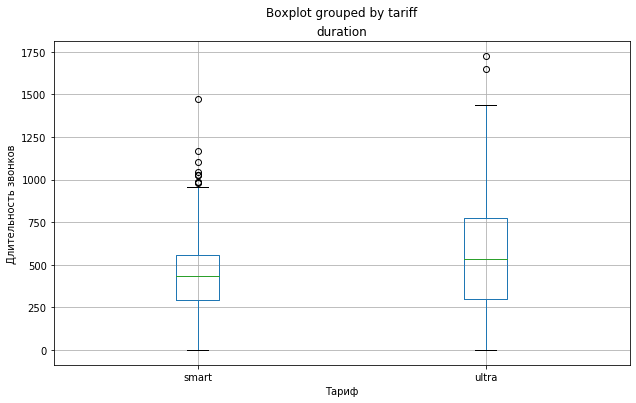

In [295]:
revenue.boxplot(column='duration', by='tariff', figsize=(10, 6))
plt.ylabel('Длительность звонков')
plt.xlabel('Тариф')

Text(0.5, 0, 'Длительность звонков')

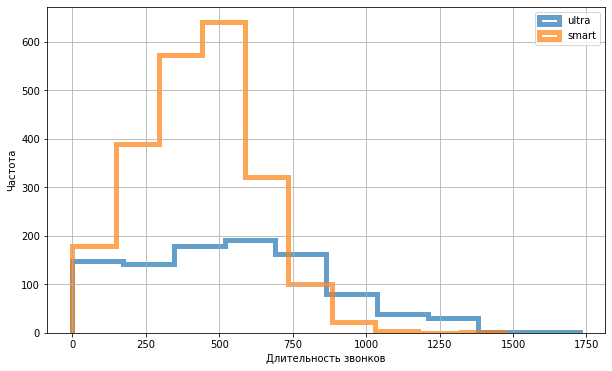

In [296]:
ax = revenue.query('tariff == "ultra"')[['duration']].plot(kind='hist', histtype='step', linewidth=5, alpha=0.7)
(revenue.query('tariff == "smart"')[['duration']]
 .plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, figsize=(10, 6), ax=ax, grid=True))
plt.legend(['ultra','smart'])
plt.ylabel('Частота')
plt.xlabel('Длительность звонков')

Пользователям тарифа smart требуется на 100 минут меньше разговора в месяц, чем пользователям тарифа ultra:   
медиана тарифа smart - 435 минут, медиана тарифа ultra - 535 минут.   
50% респондентов тарифа smart тратят на разговоры в месяц от 290 до 560 минут, это на 215 минут меньше, чем 50% респондентов тарифа ultra: от 300 до 775 минут.    
Нормальное распределение длительности разговоров за месяц пользователей разных тарифов уже разнится на 500 минут:     
у тарифа smart оно от 0 до 875 минут, у тарифа ultra - от 0 до 1375 минут.    
На графиках видно, что большинство клиентов тарифа smart не разговаривают более 730 минут в месяц. Тогда как длительность разговоров клиентов тарифа ultra распределена более равномерно и на более широком диапазоне почти до 1250 минут.

**Сравним распределение количества сообщений за месяц пользователей тарифов ultra и smart**

(-10, 200)

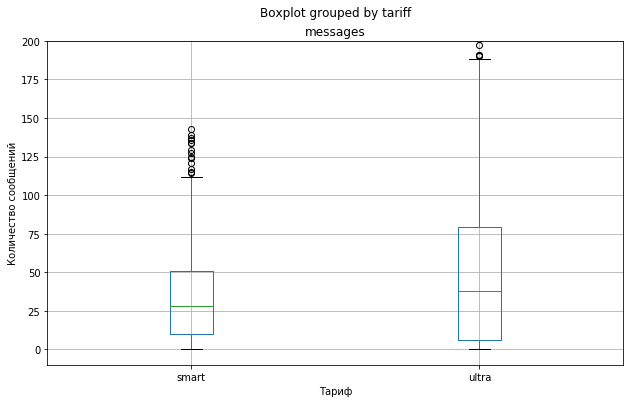

In [297]:
revenue.boxplot(column='messages', by='tariff', figsize=(10, 6))
plt.ylabel('Количество сообщений')
plt.xlabel('Тариф')
plt.ylim(-10, 200)

Text(0.5, 0, 'Количество сообщений')

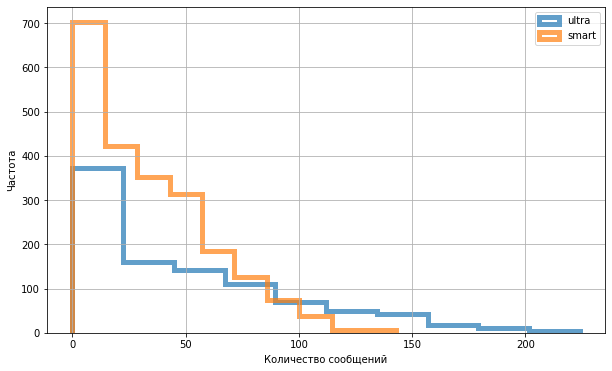

In [298]:
ax = revenue.query('tariff == "ultra"')[['messages']].plot(kind='hist', histtype='step', linewidth=5, alpha=0.7)
(revenue.query('tariff == "smart"')[['messages']]
 .plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, figsize=(10, 6), ax=ax, grid=True))
plt.legend(['ultra','smart'])
plt.ylabel('Частота')
plt.xlabel('Количество сообщений')

Пользователи тарифа smart отправляют на 26% меньше сообщений в месяц, чем пользователи тарифа ultra:
медиана тарифа smart - 28 сообщений, медиана тарифа ultra - 38 сообщений.    
Половина респондентов тарифа smart отправляют за месяц от 10 до 51 сообщений, это на 35% меньше, чем половина респондентов тарифа ultra: от 6 до 79 сообщений.   
Нормальное распределение количества сообщений за месяц пользователей разных тарифов уже разнится на 40%:
у тарифа smart оно от 0 до 112 сообщений, у тарифа ultra - от 0 до 185 сообщений.   
На графиках видно, что клиенты тарифа smart в основном ограничиваются 80 сообщениями в месяц. Распределение количества отправляемых в месяц сообщений клиентами тарифа ultra гораздо равномернее и шире, до 160 сообщений.  

**Сравним распределение использованного за месяц интернет-трафика пользователями тарифов ultra и smart**

Text(0.5, 0, 'Тариф')

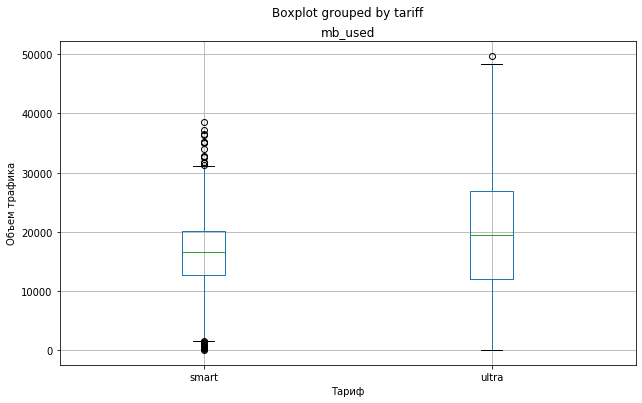

In [299]:
revenue.boxplot(column='mb_used', by='tariff', figsize=(10, 6))
plt.ylabel('Объем трафика')
plt.xlabel('Тариф')

Text(0.5, 0, 'Объем трафика')

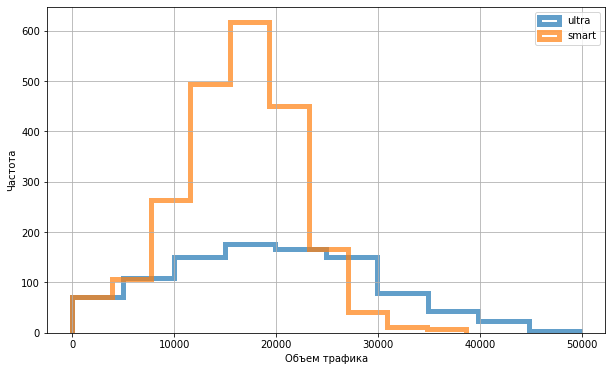

In [300]:
ax = revenue.query('tariff == "ultra"')[['mb_used']].plot(kind='hist', histtype='step', linewidth=5, alpha=0.7)
(revenue.query('tariff == "smart"')[['mb_used']]
 .plot(kind='hist', histtype='step', linewidth=5, alpha=0.7, figsize=(10, 6), ax=ax, grid=True))
plt.legend(['ultra','smart'])
plt.ylabel('Частота')
plt.xlabel('Объем трафика')

Пользователям тарифа smart в месяц требуется на 3 гигабайта меньше интернет-трафика, чем пользователям тарифа ultra:
медиана тарифа smart - 16541 мб (16 гб), медиана тарифа ultra - 19416 мб (19 гб).
50% респондентов тарифа smart используют в месяц от 12660 до 20057 мб (12.4 - 19.6 гб), а 50% респондентов тарифа ultra используют в месяц от 11875 до 26865 мб (11.6 - 26.2 гб).
Нормальное распределение использованного интернет-трафика за месяц пользователей разных тарифов тоже разнится: у тарифа smart оно от 2000 до 31000 мб (2 - 30.3 гб), у тарифа ultra - от 0 до 48000 мб (47 гб).   
На графиках хорошо видно, что распределение потребляемого в месяц интернет-трафика клиентами тарифа smart довольно узкое и ограничено объемом 26800 мб (26 гб). Тогда как распределение потребляемого в месяц интернет-трафика клиентами тарифа ultra более равномерно распределено и значительно шире: до 40000 мб (39 гб).

### Вывод   
Пользователи тарифа smart представляют устоявшуюся, стабильную по своим потребностям, группу, без выдающихся значений по длительности разговоров, количеству отправляемых сообщений и объему использованного интернет-трафика.   
Ряды пользователей тарифа ultra неоднородны: в них есть и те, кто очень много разговаривает и те, кто отправляет очень много сообщений, есть и активные пользователи интернета. Значит, у этой группы есть потенциал роста.         
В результате проведенного анализа установлено, что большинство клиентов тарифа smart не разговаривают более 730 минут в месяц. Тогда как длительность разговоров клиентов тарифа ultra распределена более равномерно и на более широком диапазоне почти до 1250 минут.    
Обнаружено, что клиенты тарифа smart в основном ограничиваются 80 сообщениями в месяц. Распределение количества отправляемых в месяц сообщений клиентами тарифа ultra гораздо шире, до 160 сообщений.   
Распределение потребляемого в месяц интернет-трафика клиентами тарифа smart довольно узкое и ограничено объемом 26800 мб (22 гб). Тогда как распределение потребляемого в месяц интернет-трафика клиентами тарифа ultra более равномерно распределено и значительно шире: до 40000 мб (39 гб).   
Если проанализировать пакет услуг, входящий в тариф "Смарт", то мы можем наблюдать, что:   
   * в абонентскую плату тарифа "Смарт" входит 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика.   
   Исходя из значений медианы тарифа "Смарт" по длительности разговоров, количеству сообщений и использованного объема интернет-трафика, можно заключить, что пакета услуг явно недостаточно для 50% пользователей тарифа "Смарт". Им приходится ежемесячно переплачивать за использованные услуги сверх тарифа.   
   Значит эти пользователи являются потенциальными клиентами тарифа "Ультра" с более широким пакетом услуг. То есть для оператора связи рекламная аудитория увеличивается на 50% пользователей тарифа "Смарт".      
   
Если проанализировать пакет услуг, входящий в тариф "Ультра", то мы можем наблюдать, что:    

   * в абонентскую плату тарифа "Ультра" входит 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика.   
   Исходя из показателей нормального распределения тарифа "Ультра" по длительности разговоров, количеству сообщений и объема использованного интернет-трафика, видно, что потребности большинства пользователей тарифа "Ультра" полностью удовлетворены в части звонков и смс. Клиентам не приходится переплачивать сверх абонентской платы. Однако 25% пользователей ежемесячно используют более, чем предоставленные пакетом услуг 30 Гб интернет-трафика, и за это им приходится доплачивать оператору. В целом, данная клиентская группа является лояльной в части удовлетворенности своим тарифом.  

<font color='green'>Очень наглядные разнообразные графики с разными тарифами в одних осях. Визуализации аккуратны и снабжены подписями. Жирный плюс за изображение разных тарифов в одних осях. Поведение пользователей описано хорошо. С этим пунктом справились очень хорошо.

<s><font color=brown>Для полного счастья можно разве что ответить на вопрос, хватает ли пользователям пакетов услуг, часто ли они переплачивают, и за что конктерно.

<b>UPD <font color=green>Отлично, это здорово добавляет понимания поведения пользователей.

### 4. Проверим гипотезы<a name="ab"></a>

#### Проверим гипотезу, что средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

In [301]:
revenue.groupby('tariff')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,2228.0,1312.854578,830.967511,550.0,555.25,1076.0,1757.5,6824.0
ultra,975.0,2072.307692,380.542285,1950.0,1950.00,1950.0,1950.0,4800.0


Исходя из показателей медианы, среднего и стандартного отклонения выручки пользователей тарифов ultra и smart можно предположить, что средняя выручка первых 2072 руб. сильно отличается от средней выручки вторых 1312 руб. Проверим это методами статистического анализа

Чтобы проверить гипотезу о равенстве средней выручки двух генеральных совокупностей - пользователей тарифа "Ультра" и тарифа "Смарт", применим метод **scipy.stats.ttest_ind()**. Данный метод применяется к двум независимым совокупностям, а пользователи тарифов "Ультра" и "Смарт" составляют независимые совокупности, так как это разные люди, поведение которых не зависит друг от друга.  

Сформулируем нулевую гипотезу: Средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт".   
Тогда альтернативная гипотеза будет звучать так: Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

Зададим критический уровень статистической значимости alpha равным 5% и проверим нулевую гипотезу

In [302]:
alpha = .05
results = st.ttest_ind(revenue.query('tariff == "ultra"')['revenue'], revenue.query('tariff == "smart"')['revenue'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.347981051562467e-148
Отвергаем нулевую гипотезу


Как видно, р-значение значительно меньше 5%, оно стремится к нулю.   
Поэтому мы отвергаем выдвинутую нами нулевую гипотезу о равенстве средней выручки пользователей тарифов "Ультра" и "Смарт".    
Значит, мы не отвергаем альтернативную гипотезу: ***Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.***

#### Проверим гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [303]:
revenue.query('city == "Москва"')['revenue'].describe()

count     611.000000
mean     1561.220949
std       753.214496
min       550.000000
25%       831.500000
50%      1776.000000
75%      1950.000000
max      5357.000000
Name: revenue, dtype: float64

In [304]:
revenue.query('city != "Москва"')['revenue'].describe()

count    2592.000000
mean     1539.982253
std       815.632705
min       550.000000
25%       750.000000
50%      1625.000000
75%      1950.000000
max      6824.000000
Name: revenue, dtype: float64

Исходя из показателей медианы, среднего и стандартного отклонения выручки пользователей из Москвы и других регионов можно предположить, что средняя выручка москвичей 1560 руб. почти не отличается от средней выручки не москвичей 1540 руб. Проверим это методами статистического анализа

Чтобы проверить гипотезу о равенстве средней выручки двух генеральных совокупностей - пользователей из Москвы и пользователей из других регионов, также применим метод **scipy.stats.ttest_ind()**, который применяется к двум независимым совокупностям. Ведь жители Москвы и других регионов - это разные люди, значит они составляют две независимые совокупности.

Сформулируем нулевую гипотезу: Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.   
Тогда альтернативная гипотеза будет звучать так: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Зададим критический уровень статистической значимости alpha равным 5% и проверим нулевую гипотезу

In [305]:
alpha = .05
results = st.ttest_ind(revenue.query('city == "Москва"')['revenue'], revenue.query('city != "Москва"')['revenue'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5570335902801198
Не получилось отвергнуть нулевую гипотезу


Как видно, р-значение более 55% и значительно превышает уровень статистической значимости.   
Значит, мы не отвергаем нулевую гипотезу о том, что ***Cредняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.***    
Поэтому мы отвергаем альтернативную гипотезу: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<font color='green'>Здесь абсолютно без вопросов, гипотезы сформулированы и проверены верно. Выборки для проверки построены верно. Методы выбраны верно. Ты отлично понимаешь принцип проверки гипотез.

### 5. Вывод <a name="a"></a>

Перед нами стояла цель - из двух тарифов "Ультра" и "Смарт" федерального оператора сотовой связи - телеком компании «Мегалайн» определить, какой из них является перспективным для развития телеком компанией в дальнейшем.      
В нашем распоряжении были данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.   

Для проведения анализа поведения клиентов и принятия решения, какой тариф лучше, была проведена предобработка данных: 

Столбцы с датами в таблицах calls, internet, messages и users приведены к требуемому типу datetime.   
Столбец churn_date таблицы users был удален, так как количество информации в столбце составляло всего 7.6%, и сама информация о расторжении клиентами договоров не влияла на анализ действующих тарифов оператора связи.   
Столбец duration таблицы calls и столбец mb_used таблицы internet содержали 20% и 13% соответственно нулевых данных.    Так как объем нулевых данных достаточно большой, а нулевые звонки и интернет-трафик, по-видимому, тарифицируются оператором как факт пользования респондентом услугой связи, было решено заменить нули на единицы.   

**Для каждого пользователя было посчитано:**   

   * количество сделанных звонков и израсходованных минут разговора по месяцам   
   * количество отправленных сообщений по месяцам   
   * объем израсходованного интернет-трафика по месяцам   
   * помесячная выручка.   
   
**Был проведен сравнительный анализ основных метрик тарифов "Ультра" и "Смарт":** 

   * длительность разговоров пользователей в месяц   
   * количество отправленных пользователями сообщений в месяц   
   * объем использованного интернет-трафика пользователями в месяц.   
   

В результате проведенного анализа установлено, что большинство клиентов тарифа "Смарт" не разговаривают более 730 минут в месяц. Тогда как длительность разговоров клиентов тарифа "Ультра" распределена более равномерно и на более широком диапазоне почти до 1250 минут.   
Обнаружено, что клиенты тарифа "Смарт" в основном ограничиваются 80 сообщениями в месяц, это в два раза меньше, чем клиенты тарифа "Ультра". Распределение количества отправляемых в месяц сообщений клиентами тарифа "Ультра" гораздо шире, до 160 сообщений.   
Распределение потребляемого в месяц интернет-трафика большинством клиентов тарифа "Смарт" довольно узкое и ограничено объемом от 11875 до 26865 мб (11.6 - 26.2 гб). Тогда как распределение потребляемого в месяц интернет-трафика большинством клиентов тарифа "Ультра" более равномерно распределено и значительно шире: от 0 до 48000 мб (47 гб).      

**Следовательно, можно сделать вывод, что пользователи тарифа "Смарт" представляют устоявшуюся, стабильную по своим потребностям, группу, без выдающихся значений по длительности разговоров, количеству отправляемых сообщений и объему использованного интернет-трафика.**   

Исходя из значений медианы тарифа "Смарт" по длительности разговоров, количеству сообщений и использованного объема интернет-трафика, можно заключить, что пакета услуг явно недостаточно для 50% пользователей тарифа "Смарт". Им приходится ежемесячно переплачивать за использованные услуги сверх тарифа.   

**Значит половина пользователей тарифа "Смарт" является потенциальными клиентами тарифа "Ультра" с более широким пакетом услуг. То есть для оператора связи "Мегалайн" рекламная аудитория увеличивается на 50% пользователей тарифа "Смарт".**     

**Ряды пользователей тарифа "Ультра" неоднородны: в них есть и те, кто очень много разговаривает и те, кто отправляет очень много сообщений. Значит, у этой группы есть потенциал роста в части доходности для оператора связи "Мегалайн".**   

Для проведения сравнительного анализа основной метрики - средней выручки тарифов "Ультра" и "Смарт", были сформулированы и проанализированы две гипотезы:   

   1. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается   
   2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов   
   
В результате проведенного статистического анализа мы выяснили, что:   

   **1. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается. Причем средняя выручка тарифа "Ультра" составляет почти 160% от средней выручки тарифа "Смарт".**   
   
   **2. Cредняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов. Показатели почти равны: 1560 руб. и 1540 руб. соответственно.**   
   
Таким образом  мы установили, что наиболее перспективным тарифом в плане роста доходности для оператора сотовой связи "Мегалайн" является тариф "Ультра". Причем развивать его следует не только в Москве, а на всей территории Российской Федерации. 

<font color='green'>Очень подробный и отлично структурированный вывод. Резюмируются все полученные результаты, дается ответ на центральный вопрос проекта.

<font color='green'>К оформлению работы претензий нет. Соблюдена структура проекта, полноценно используется разметка для комментариев. Код чистый, выводы понятные.

---

<font color='blue'>Итак, очень хорошая работа, ты показываешь отличные знания нового материала и умение их применять. Ты уверенно объединяешь и аггрегируешь данные из разных датафреймов, считаешь статистические параметры и работаешь с гипотезами. Также строишь хорошие графики с данными по разным тарифам на одних осях. У тебя верные и четкие выводы.  
    Однако у меня есть несколько замечаний, уверен, тебе не составит труда их учесть и довести работу до идеала. Буду ждать доработанный проект, успехов!

<b>UPD: <font color='blue'>Больше вопросов не имею, с удовольствием принимаю работу. Успехов в сборном проекте!